In [12]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [13]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [14]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [15]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [16]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

611

In [21]:
import requests
# Import the API key.
from config import weather_api_key

In [18]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [22]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | busselton
Processing Record 2 of Set 1 | san patricio
Processing Record 3 of Set 1 | vaini
Processing Record 4 of Set 1 | bethel
Processing Record 5 of Set 1 | hilo
Processing Record 6 of Set 1 | norman wells
Processing Record 7 of Set 1 | longyearbyen
Processing Record 8 of Set 1 | bredasdorp
Processing Record 9 of Set 1 | saskylakh
Processing Record 10 of Set 1 | kuopio
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | albany
Processing Record 13 of Set 1 | praia da vitoria
Processing Record 14 of Set 1 | mataura
Processing Record 15 of Set 1 | ambovombe
Processing Record 16 of Set 1 | nguiu
City not found. Skipping...
Processing Record 17 of Set 1 | hobart
Processing Record 18 of Set 1 | mikhaylovka
Processing Record 19 of Set 1 | atuona
Processing Record 20 of Set 1 | rikitea
Processing Record 21 of Set 1 | port lincoln
Processing Record 22 of Set 1 | majene
Processing R

Processing Record 41 of Set 4 | saeby
Processing Record 42 of Set 4 | cocorit
Processing Record 43 of Set 4 | kemijarvi
Processing Record 44 of Set 4 | marion
Processing Record 45 of Set 4 | torbay
Processing Record 46 of Set 4 | alice springs
Processing Record 47 of Set 4 | lebu
Processing Record 48 of Set 4 | sivaki
Processing Record 49 of Set 4 | san cristobal
Processing Record 50 of Set 4 | imisli
City not found. Skipping...
Processing Record 1 of Set 5 | colquiri
Processing Record 2 of Set 5 | hildburghausen
Processing Record 3 of Set 5 | marabba
Processing Record 4 of Set 5 | juneau
Processing Record 5 of Set 5 | broken hill
Processing Record 6 of Set 5 | plattsburgh
Processing Record 7 of Set 5 | louisbourg
City not found. Skipping...
Processing Record 8 of Set 5 | la ronge
Processing Record 9 of Set 5 | inongo
Processing Record 10 of Set 5 | bengkulu
Processing Record 11 of Set 5 | meulaboh
Processing Record 12 of Set 5 | east london
Processing Record 13 of Set 5 | dunedin
Proc

Processing Record 33 of Set 8 | san rafael
Processing Record 34 of Set 8 | monte alegre de sergipe
Processing Record 35 of Set 8 | tulun
Processing Record 36 of Set 8 | port-gentil
Processing Record 37 of Set 8 | arrecife
Processing Record 38 of Set 8 | hualmay
Processing Record 39 of Set 8 | tiksi
Processing Record 40 of Set 8 | pannonhalma
Processing Record 41 of Set 8 | rubtsovsk
Processing Record 42 of Set 8 | cabedelo
Processing Record 43 of Set 8 | atambua
Processing Record 44 of Set 8 | port shepstone
Processing Record 45 of Set 8 | phan thiet
Processing Record 46 of Set 8 | pisco
Processing Record 47 of Set 8 | sainte-marie
Processing Record 48 of Set 8 | quatre cocos
Processing Record 49 of Set 8 | the valley
Processing Record 50 of Set 8 | magaria
Processing Record 1 of Set 9 | bose
Processing Record 2 of Set 9 | eatonton
Processing Record 3 of Set 9 | lodja
Processing Record 4 of Set 9 | zemio
Processing Record 5 of Set 9 | huanren
Processing Record 6 of Set 9 | san-pedro
Pr

Processing Record 21 of Set 12 | kalmanka
Processing Record 22 of Set 12 | marolambo
Processing Record 23 of Set 12 | nizhnyaya poyma
Processing Record 24 of Set 12 | chom bung
City not found. Skipping...
Processing Record 25 of Set 12 | kirakira
Processing Record 26 of Set 12 | xining
Processing Record 27 of Set 12 | kismayo
Processing Record 28 of Set 12 | sinnamary
Processing Record 29 of Set 12 | puerto madryn
Processing Record 30 of Set 12 | elat
Processing Record 31 of Set 12 | hami
Processing Record 32 of Set 12 | saint-pierre
Processing Record 33 of Set 12 | atar
Processing Record 34 of Set 12 | barentsburg
City not found. Skipping...
Processing Record 35 of Set 12 | sabang
Processing Record 36 of Set 12 | mirina
City not found. Skipping...
Processing Record 37 of Set 12 | alikalia
Processing Record 38 of Set 12 | marcona
City not found. Skipping...
Processing Record 39 of Set 12 | muravlenko
Processing Record 40 of Set 12 | panzhihua
Processing Record 41 of Set 12 | grand baie

In [24]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Busselton,-33.6500,115.3333,66.11,82,13,4.12,AU,2021-01-19 17:46:36
1,San Patricio,28.0170,-97.5169,73.99,73,90,24.16,US,2021-01-19 17:46:36
2,Vaini,-21.2000,-175.2000,73.40,100,40,2.30,TO,2021-01-19 17:46:36
3,Bethel,41.3712,-73.4140,37.40,52,90,5.75,US,2021-01-19 17:43:59
4,Hilo,19.7297,-155.0900,68.00,88,90,8.05,US,2021-01-19 17:44:33
5,Norman Wells,65.2820,-126.8329,12.20,92,90,5.75,CA,2021-01-19 17:46:36
6,Longyearbyen,78.2186,15.6401,17.60,62,40,18.41,SJ,2021-01-19 17:46:36
7,Bredasdorp,-34.5322,20.0403,69.80,64,23,18.41,ZA,2021-01-19 17:46:36
8,Saskylakh,71.9167,114.0833,-21.82,86,100,6.24,RU,2021-01-19 17:46:37
9,Kuopio,62.8924,27.6770,26.60,100,90,2.30,FI,2021-01-19 17:46:37


In [25]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)



,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Busselton,AU,2021-01-19 17:46:36,-33.6500,115.3333,66.11,82,13,4.12
1,San Patricio,US,2021-01-19 17:46:36,28.0170,-97.5169,73.99,73,90,24.16
2,Vaini,TO,2021-01-19 17:46:36,-21.2000,-175.2000,73.40,100,40,2.30
3,Bethel,US,2021-01-19 17:43:59,41.3712,-73.4140,37.40,52,90,5.75
4,Hilo,US,2021-01-19 17:44:33,19.7297,-155.0900,68.00,88,90,8.05
5,Norman Wells,CA,2021-01-19 17:46:36,65.2820,-126.8329,12.20,92,90,5.75
6,Longyearbyen,SJ,2021-01-19 17:46:36,78.2186,15.6401,17.60,62,40,18.41
7,Bredasdorp,ZA,2021-01-19 17:46:36,-34.5322,20.0403,69.80,64,23,18.41
8,Saskylakh,RU,2021-01-19 17:46:37,71.9167,114.0833,-21.82,86,100,6.24
9,Kuopio,FI,2021-01-19 17:46:37,62.8924,27.6770,26.60,100,90,2.30


In [28]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [29]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


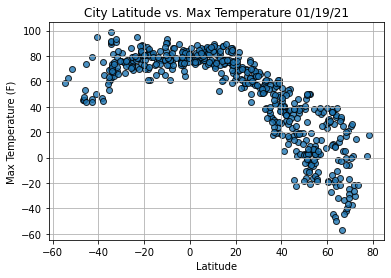

In [31]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

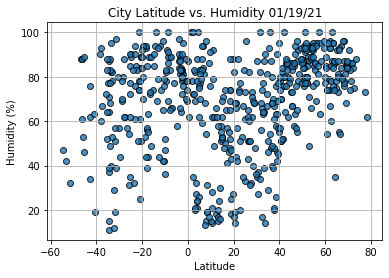

In [32]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

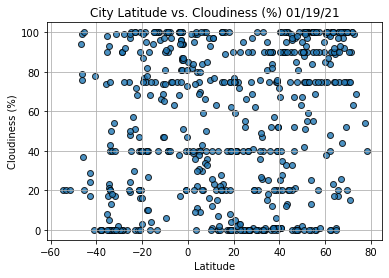

In [33]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

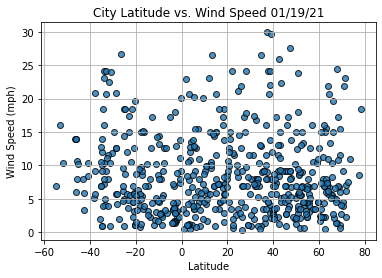

In [34]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()
